# Héctor Delgado Díaz and Samantha Gilbert

## Exoplanets Spring 2020

## HW 1a

### Problem 1

In this problem, we wish to develop a Kepler's EQ solver. We outlined the method we will use in class, in which we will optimize over Kepler's equation using Newton's method.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from scipy import optimize
import pandas as pd

In [26]:
# We first define a function that gives the solution to 
# the two-body problem in the form of Kepler's equation. 
# Since M = E - e * sin(E), we expect this function to equal 
# approximately 0 when correct. We will optimize over this 
# function using Newton's method.
#
# E = eccentric anomaly
# e = eccentricity 
# M = mean anomaly

def g(E, e, m):
    return E - e * np.sin(E) - m

In [3]:
# We now define a function that gives the partial derivative 
# of our first function g with respect to the eccentric anomaly E.
# Calculating the value of this partial derivative will help us
# to calculate E_i+1 at each subsequent iteration.

def dg_dE(E, e):
    return 1 - e * np.cos(E) 

In [40]:
kepler(1., 0.3)

1.2880913132118377

In [192]:
# We will optimize over our function for g using Newton's method.
# In this method, we initialize the function with a starting guess 
# for the zeroth E given by:
# 
# E_0 = M + 0.85 * e * sign(sin(M)) 
# 
# where "sign" indicates a conditional function that changes the sign 
# in front of sin(M). 
# 
# We then iterate until we converge on a value for E. We accomplish
# this iteration by finding
# 
# dg/dE = 1 - e * cos(E)
# 
# and define each subsequent iteration of E relative to the last using
# the recursive relation
#
# E_i+1 = E_i - g(E, e, M)/(dg/dE)

def kepler(M, e):
    
    #Calculate initial values for E, g, and dg/dE.
    
    E_0 = M + 0.85 * e * np.sign(np.sin(M))
    
    g_0 = g(E_0, e, M) # Calculate the zeroth g given the zeroth E value
    
    dg_dE_0 = dg_dE(E_0, e) # Calculate the zeroth partial deriv. given the zeroth E value
    
    
    # Continue to interate as long as the last E value exceeds the given tolerance.
    
    while np.amax(abs(-g(E_0, e, M)/dg_dE(E_0, e))) > 1E-9: # We define our tolerance for convergence to be 1e-14 based on the recommendation given in class
        
        E = E_0 - (g(E_0, e, M) / dg_dE(E_0, e)) # Calculate the next E value
        
        E_0 = E # Set the last E value as the new starting value
        
    return E_0 

Now that we have built our solver, we can test it by running it on a grid of e and M values and  verifying that the calculated E values always return the same M values. After calculating E and M, we compare the calculated M values to the true M values by subtracting the two. We observe that all differences return answers equal or very close to zero, showing that our solver works.

We also show a plot comparing the E and M orbital parameters. We see that for e = 0, or a circular orbit, we have E = M which produces a straight line on the plot. For increasingly higher eccentricities, the E and M values diverge more and more, culminating in the teal line representing the highest eccentricity.

/Users/samanthagilbert/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/ipykernel/__main__.py:33: RuntimeWarning: invalid value encountered in double_scalars


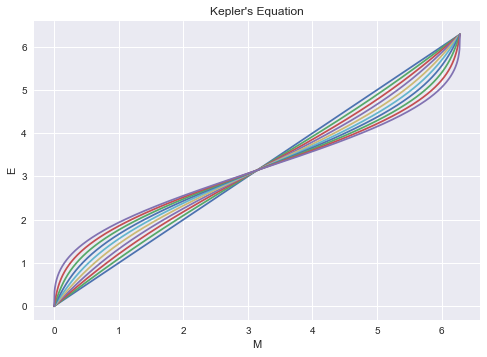

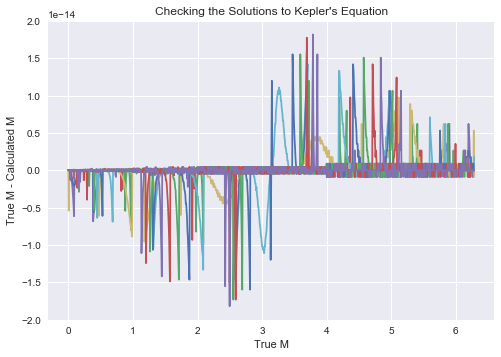

In [5]:
# Now that we have defined the necessary functions, we can test
# our solver on an array of e and M values. As given by the question,
# we will test values
# 
# 0 < e < 1
#
# and
#
# 0 < M < 2 * np.pi

e_vals = np.linspace(0, 1, 10) 

M_vals = np.linspace(0, 2 * np.pi, 1000)

'''-------------------------------------------------------------------'''

# Create the figure.

fig1 = plt.figure()

ax1 = plt.axes()

ax1.set_title('Kepler\'s Equation')

fig2 = plt.figure()

ax2 = plt.axes()

ax2.set_title('Checking the Solutions to Kepler\'s Equation')

'''-------------------------------------------------------------------'''

for e in e_vals:
    
    E_ans = [] # Initialize an array for storing our calculated E's.
    
    M_calc = []
    
    for M in M_vals:
        
        E = kepler(M, e) # Calculate E for the given M and e grids.
        
        E_ans.append(E) # Populate the array with the E's we've calculated.
        
        M_calc.append(E - e * np.sin(E))
        
    ax1.plot(M_vals, E_ans) # Plot the M values on the x-axis, and the calculated E values on the y.
    
    ax2.plot(M_vals, M_vals - M_calc)      
    
ax1.set_xlabel('M')

ax1.set_ylabel('E')

ax2.set_xlabel('True M')

ax2.set_ylabel('True M - Calculated M')

### Problem 2
In this problem, we will test our solver on a grid of e and M values and verify that we have actually optimized the function g using Newton's method. In order to verify this, we will calculate the solution to the function g for this e, M grid, and verify that the solutions are lower than the tolerance we set in our solver. This exercise produces very similar results to our last check, as the function g is essentially the difference between the "true" M and the calcualted M.

/Users/samanthagilbert/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/ipykernel/__main__.py:33: RuntimeWarning: invalid value encountered in double_scalars


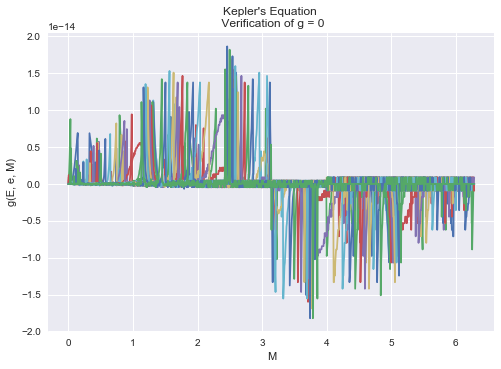

In [6]:
e_vals = np.linspace(0, 1, 20) 

M_vals = np.linspace(0, 2 * np.pi, 1000)


# Create the figure.

fig = plt.figure()

ax = plt.axes()

ax.set_title('Kepler\'s Equation \n Verification of g = 0')

'''-------------------------------------------------------------------'''

for e in e_vals:
    
    E_ans = [] # Initialize an array for storing our calculated E's.
    
    g_ans = [] # Initialize an array for storing our calculated g's.
    
    for M in M_vals:
        
        E_vals = kepler(M, e) # Calculate E for the given M and e grid.
        
        E_ans.append(E_vals) # Populate the array with the E's we've calculated.
        
        g_vals = g(E_vals, e, M) # Calculate g for the given M and e grid and the E's we calculated.
        
        g_ans.append(g_vals) # Populate the array with the g's we've calculated.
        
    ax.plot(M_vals, g_ans) # Plot the M values on the x-axis, and the calculated E values on the y.
    
    #print(np.shape(g_ans))
    
ax.set_xlabel('M')

ax.set_ylabel('g(E, e, M)')

## HW 1b

### Problem 1

In this problem, we want to write a function to implement the radial velocity/Doppler formula for a planet on an elliptical orbit by calling our Kepler solver.

In [56]:
# We use the radial velocity formula outlined in Wright & Howard (2009)
# to implement the RV/Doppler formula for a planet on an elliptical orbit.
# As defined in the paper, we take:
#
# h = K_star * cos(pomega)
#
# c = -K_star * sin(pomega)
#
# v_0 = gamma + K_star * cos(pomega)
#
# The variable "f" represents the true anomaly, which we will calculate 
# using the E values we calculated from our Kepler solver.

def calc_rv(h, c, v_0, f):
    return np.multiply(h, np.cos(f)) + np.multiply(c, np.sin(f)) + v_0

def f(e, E):
    return 2 * np.arctan( ((1 + e) / (1 - e))**(1/2) * np.tan(E / 2) )


### Problem 2

In this problem, we want to write a function to calculate the phase from the RV dataset provided in the "mystery planet" text file. We then want to plot a periodogram for this data.

In [8]:
path = '/Users/samanthagilbert/Desktop/'

file_name = 'mystery_planet01.txt'

data = pd.read_csv(path+file_name, delim_whitespace=True, header=None)

time = data[0]
rv = data[1]
rv_err = data[2]

data.columns = ['time','rv','rv_err']

In [9]:
# By definition, the phase of a sinusoid is equal to time divided 
# by the period. Here, P = orbital period.

def calc_phase(time, P):
    phase = (time % P)
    #print(phase)
    return phase

We now want a function that calculates the scatter of the RV based on the period time. We define scatter at each period to be the difference in neighboring radial velocity data squared such that

$$\sigma = (RV_i - RV_{i+1})^2 $$

The best fit period will minimize the scatter.

In [10]:
# The formula is given by
#
# S_p = Sum(v_i - v_(i+1))^2 from i=1 to i = N-1
#
# S_p is the scattering per period and v denotes the radial velocity at two adjacent intervals.
# The sum is over all the radial velocities.

def calc_scatter(rv_sort): # The RV is sorted in terms of the phase
    N = rv_sort.shape[0]
    scatter = 0
    for i in range(N - 1):
        scatter += (rv_sort[i] - rv_sort[i + 1])**2
    return scatter

We define a periodogram function to create the plots of the RV in terms of the RV scattering and the period of the planet.

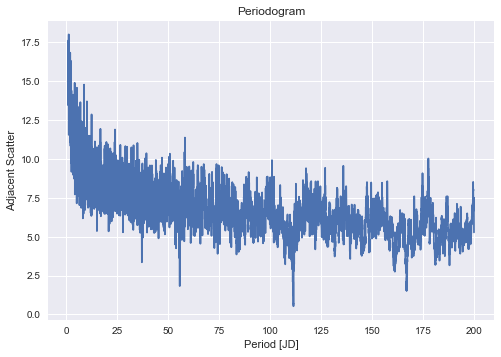

In [11]:
scatters = []
for p in np.linspace(1, 200, 10000):
    data['{:3f}'.format(p)] = calc_phase(data.time, p)
    scatters.append(calc_scatter(data.sort_values('{:3f}'.format(p)).rv.values))

plt.plot(np.linspace(1, 200, 10000),scatters)
ax = plt.axes()
ax.set_title('Periodogram')
ax.set_xlabel('Period [JD]')
ax.set_ylabel('Adjacent Scatter')
plt.show()

Having plotted scatters for multiple periods, we find the period that minimizes the scatter to identify the orbital period of the RV data.

In [12]:
np.linspace(1, 200, 10000)[np.argmin(scatters)]

111.47594759475948

We find that the period that minimizes the scatter is P = 111.356 JD. Using this period to resort our RV and folded time data, we can produce a new periodogram.

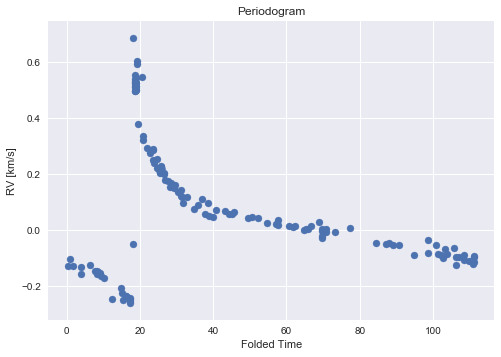

In [14]:
p = 111.35635635635636
data['{:3f}'.format(p)] = calc_phase(data.time, p)
rv_periodogram = data.sort_values('{:3f}'.format(p)).rv.values
folded_time = data.sort_values('{:3f}'.format(p))['{:3f}'.format(p)]

plt.scatter(folded_time,rv_periodogram)
ax = plt.axes()
ax.set_title('Periodogram')
ax.set_xlabel('Folded Time')
ax.set_ylabel('RV [km/s]')
plt.show()

### Problem 3

In this problem, we will fit the folded RV data and adjust the parameters to improve our fit. We will then report the best fit values for P, e, $t_p$, $\gamma$, and K.

#### Step 1: Optimize the orbital parameters M, E, and f.

The first objective for fitting the RV data is to optimize the orbital parameters. We use the functions we previously defined to calculate the RV and f, as well as our Kepler solver to find E. 

In [193]:
# We define two new functions to calculate the orbital parameter M (mean amomaly) 
# and the chi squared.

def M(P, t, t_p):
    return (2 * np.pi * (t - t_p)) / P

def chi_squared(rv, rv_err, calc_rv):
    return np.sum((rv - calc_rv)**2 / rv_err**2)

In [194]:
def solve_hcv(time_data, rv_data, rv_err, P, e, t_p):
    
    M_vector = M(P, time_data, t_p)
    E_vector = kepler(M_vector, e)
    f_vector = f(e, E_vector)
    
    W = np.diag(1 / (rv_err ** 2.))
    F = np.concatenate([np.cos(f_vector).reshape(-1,1),
                        np.sin(f_vector).reshape(-1,1),
                        np.ones(f_vector.shape[0]).reshape(-1,1)], axis = 1).T
    
    eye = 1e-9 * np.diag(np.ones(F.shape[0]))
    cov = np.linalg.inv(F.dot(W).dot(F.T) + eye)
    
    beta = rv_data.reshape(1,-1).dot(W).dot(F.T).dot(cov).reshape(-1)
    
    predicted_rv = calc_rv(beta[0], beta[1], beta[2], f_vector)
    
    return beta, chi_squared(rv, rv_err, predicted_rv)

In [195]:
rv_periodogram = data.sort_values('{:3f}'.format(p)).rv.values
folded_time = data.sort_values('{:3f}'.format(p))['{:3f}'.format(p)]
rv_err_folded = data['rv_err'].iloc[folded_time.index]

In [196]:
def obj_func(P, e, t_p):

    time_data = folded_time.values
    rv_data = rv_periodogram
    rv_err = rv_err_folded.values
    
    beta, chi_sq = solve_hcv(time_data, rv_data, rv_err, P, e, t_p)
    
    return beta, chi_sq

In [212]:
obj_func(111.47594759475948, e, t_p)

(array([-0.09207507,  0.30082381, -0.00927935]), 218510.91088984496)

In [204]:
best_e = None
best_tp = None
best_fit = 10e14
best_beta = None

potential_e = np.linspace(0.0,1,250)
potential_tp = np.linspace(folded_time.min(),folded_time.max(), 250)

for e in potential_e:
    for _,t_p in enumerate(potential_tp):
        beta, chi_sq = obj_func(111.47594759475948, e, t_p)
        if chi_sq < best_fit:
            best_e = e
            best_tp = t_p
            best_beta = beta
            best_fit = chi_sq
            print(chi_sq)

203295.77835798814
203295.77835798808
203295.77835798793
203295.7783579879
203294.5488034852
203291.63265145477
203288.7194498857
203285.81099979917
203282.90909910674
203280.01554154896
203277.1321156404
203274.2606036138
203271.4027803706
203268.5604124346
203265.73525691053
203262.92906044787
203260.14355821023
203257.38047285107
203254.6415134959
203251.9283747315
203249.2427356035
203246.58625862093
203243.9605887707
203241.36735253976
203238.80815694842
203236.28458859219
203233.79821269526
203231.35057217468
203228.94318671533
203226.57755185862
203224.25513810117
203221.97739000895
203219.74572534353
203217.5615342011
203215.4261781684
203213.3409894912
203211.3072702599
203209.3262916082
203207.39929293137
203205.52748111816
203203.7120298014
203201.95407862592
203200.2547325338
203198.61506106888
203197.03609769978
203195.51883916184
203194.06424481922
203192.673236047
203191.3466956341
203190.08546720672
203188.89035467338
203187.76212169172
203186.70149115776
203185.7091447

/Users/samanthagilbert/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/ipykernel/__main__.py:33: RuntimeWarning: invalid value encountered in true_divide
/Users/samanthagilbert/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/ipykernel/__main__.py:18: RuntimeWarning: divide by zero encountered in double_scalars
/Users/samanthagilbert/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in multiply


In [205]:
print(best_e)
print(best_tp)
print(best_beta)
print(best_fit)

0.9839357429718875
19.17976662196155
[0.27568933 0.34849528 0.36053626]
174180.0068555217


In [213]:
from scipy.optimize import minimize

x_init = np.asarray([111.47594759475948, 0.9388, 10.625])

minimize(obj_func, x_init, method='nelder-mead',
         options={'xtol': 1e-12, 'disp': True})

TypeError: obj_func() missing 2 required positional arguments: 'e' and 't_p'

In [166]:
beta, x2 = solve_hcv(folded_time, rv_periodogram, rv_err_folded , 86.414123  ,  0.99999218, 56.88773969)

/Users/samanthagilbert/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Users/samanthagilbert/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/ipykernel/__main__.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


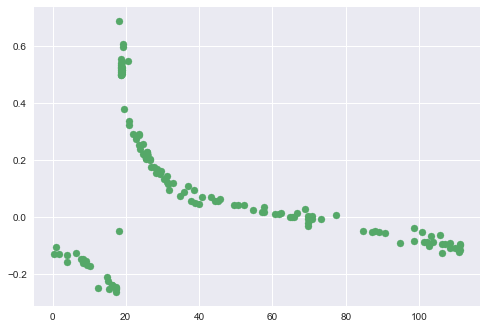

In [207]:
M_vector = M(111.47594759475948, folded_time, 19.17976662196155)
E_vector = kepler(M_vector, 0.9839357429718875)
f_vector = f(0.9839357429718875, E_vector)
plt.scatter(folded_time,calc_rv(beta[0], beta[1], beta[2], f_vector))
plt.scatter(folded_time,rv_periodogram)